# <center> Data Mining & Analysing misdemeanours and crimes recorded by the french police and gendarmerie since 1996 </center>

# <center>Table des matières</center>

[2. Analyse macro du jeu de données](#section2) <br>
&emsp; [2.1. France Métropolitaine](#section2.1) <br>
&emsp; [2.2. Crimes et délit par département](#section2.2) <br>


&emsp; [2.3. Analyse focalisée](#section2.3) <br>
&emsp;&emsp; [2.3.1. Cambriolage](#section2.3.1) <br>
&emsp;&emsp; [2.3.1. Homicides](#section2.3.2) <br>
&emsp;&emsp; [2.3.1. Vols](#section2.3.3) <br>


<a id='section1'></a>
## 1. Préparation des données pour l'analyse / Preparing the data for analysis
Source : <br>
- [Estimation de la population INSEE](https://www.insee.fr/fr/statistiques/1893198)
([Document source](https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2020.xls))

- [Crimes et délits enregistrés en France](https://www.data.gouv.fr/fr/datasets/chiffres-departementaux-mensuels-relatifs-aux-crimes-et-delits-enregistres-par-les-services-de-police-et-de-gendarmerie-depuis-janvier-1996/)
([Document source](https://www.data.gouv.fr/fr/datasets/r/fdf5afbf-ed3c-4c54-a4f0-3581c8a1eca4))


<a id='section1.1'></a>
### *1.1. Importation des outils / Tools import*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

In [2]:
# Transformation de base

### Generique variables definition to import
source = 'source/'
xl_misdemeanours_crimes_path = source + 'tableaux-4001-ts.xlsx'
xl_population_path = source + 'estim-pop-dep-sexe-gca-1975-2020.xls'

### Excel file import
crime_xl_data = pd.ExcelFile(xl_misdemeanours_crimes_path)
population_xl_data = pd.ExcelFile(xl_population_path)

# Define France metropolitaine
current_sheet = crime_xl_data.sheet_names[1]

# Read one sheet to begin ('Fra<nce_Métro') --> libellée index to write minus two lines
df = pd.read_excel(crime_xl_data, current_sheet, index_col = 'libellé index')

# Drop init 'index' columns, and Transpose Data
df = df.drop(columns=['Index'])
df = df.T

df_all = pd.DataFrame(columns=df.columns.values)
df_all['departement'] = np.nan

all_name_sheet = crime_xl_data.sheet_names
invalid_sheet = ['France_Entière','France_Métro']
all_name_sheet = [e for e in all_name_sheet if e not in invalid_sheet]

for i in all_name_sheet:
    df_tmp = pd.read_excel(crime_xl_data, sheet_name=str(i), index_col = 'libellé index')
    df_tmp = df_tmp.drop(columns=['Index'])
    df_tmp = df_tmp.T
    df_tmp['departement'] = str(i)
    df_all = df_all.append(df_tmp) 
    
# Sur le jeu de donnée France métropolitaine
# Reset index, Get Year, Get Month
df = df.reset_index()
df['year'] = df['index'].astype(str).str[0:4]
df['month'] = df['index'].astype(str).str[5:7]

# Define new date column
combined = df.year.str.cat(df.month,sep=' ')
df['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df = df.drop(columns='index')
df = df.set_index('date')

# Sur le jeu de donnée complet
# Reset index, Get Year, Get Month
df_all = df_all.reset_index()
df_all['year'] = df_all['index'].astype(str).str[0:4]
df_all['month'] = df_all['index'].astype(str).str[5:7]

# Define new date column
combined = df_all.year.str.cat(df_all.month,sep=' ')
df_all['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df_all = df_all.drop(columns='index')
df_all = df_all.set_index('date')

df.year = df.year.astype(str).astype(int)
df.month = df.month.astype(str)


# Define names of index and columns
df.index.names = ['index']
df.columns.names = ['libellé columns']

df_all = df_all.drop(columns='Index non utilisé')
df = df.drop(columns='Index non utilisé')

<a id='section2'></a>
## 2. Analyse macro du jeu de données / Macro data analyse
Intéressons-nous au jeu de données du point de vue macro.

In [3]:
# Examine the shape of the DataFrame
print(df.shape)

# Count the number of missing values in each column
print(df.isnull().sum().values)

(289, 105)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Le jeu de donnée est composé de 289 observations pour 105 dimensions. Aucune valeur null ou manquante n’est répertoriée. C'est bien, nous n'allons pas avoir besoin d'effectuer une manipulation de traitements les concernant.

Le jeu de donnée dispose de libellés très explicites. Les voici :

In [4]:
print(df.columns.values)

['Règlements de compte entre malfaireurs'
 "Homicides pour voler et à l'occasion de vols"
 "Homicides pour d'autres motifs"
 "Tentatives d'homicides pour voler et à l'occasion de vols"
 "Tentatives homicides pour d'autres motifs"
 'Coups et blessures volontaires suivis de mort'
 'Autres coups et blessures volontaires criminels ou correctionnels'
 "Prises d'otages à l'occasion de vols"
 "Prises d'otages dans un autre but" 'Sequestrations'
 'Menaces ou chantages pour extorsion de fonds'
 'Menaces ou chantages dans un autre but'
 'Atteintes à la dignité et à la personnalité' 'Violations de domicile'
 'Vols à main armée contre des établissements financiers'
 'Vols à main armée contre des éts industriels ou commerciaux'
 'Vols à main armée contre des entreprises de transports de fonds'
 'Vols à main armée contre des particuliers à leur domicile'
 'Autres vols à main armée'
 'Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels'
 'Vols avec armes blanches 

Ces informations nous permettent de comprendre que ce jeu de donnée regroupe principalement des incidents (crimes ou délits) agrégés par mois d'activité. Aussi pour améliorer notre étude, nous renforçons-le en ajoutant des données concernant la population française.

<a id='section2.1'></a>
### *2.1. France Métropolitaine*
Le jeu de donnée **population_xl_data** est une estimation de la population française diversifiée par les départements, les années ainsi que le sexe des individus. Il va nous permettre par croisement d'apporter des indications complémentaires sur les actes criminels en France.

<a id='section2.1.1'></a>
#### *2.1.1. Description élémentaire*

In [5]:
# Chargement de XL en Dataframe
df_population = pd.read_excel(population_xl_data, '2020', header = 4, index='Départements')
# Nettoyage du jeu de données
df_population.rename(columns={'Unnamed: 0':'Departement','Total.1':'Total Homme','Total.2':'Total Femme'}, inplace=True)

# Suppresion des lignes indésirables
df_population = df_population.drop([96, 102, 103, 104, 105])

valid_population_columns = ['Departement', 'Total','Total Homme','Total Femme']

# Finition sur le DataFrame
df_population = df_population[valid_population_columns]
df_population.head()

Departement     Total  Total Homme  Total Femme
0          01  656955.0     323345.0     333610.0
1          02  526050.0     256977.0     269073.0
2          03  331315.0     158212.0     173103.0
3          04  165197.0      80612.0      84585.0
4          05  141756.0      69231.0      72525.0

In [6]:
total_population_france_metropolitaine = df_population.loc[:96,'Total'].sum()
total_population_dom = df_population.loc[96:,'Total'].sum()
total_population_france_metropolitaine_dom = df_population.loc[:,'Total'].sum()

# En 2020
print("La population de la France métropolitaine est estimée à " + str(int(total_population_france_metropolitaine)) + " individus.")
print("La population des DOMs est estimée à " + str(int(total_population_dom)) + " individus.")
print("La population de la France métropolitaine et des DOMs est estimée à " + str(int(total_population_france_metropolitaine_dom)) + " individus.")

La population de la France métropolitaine est estimée à 64897954 individus.
La population des DOMs est estimée à 2165749 individus.
La population de la france métropolitaine et des DOMs est estimée à 67063703 individus.


In [7]:
df_population['% Population Métropolitaine'] = round(df_population.Total / total_population_france_metropolitaine_dom * 100, 2)

print("Vérification % data : " + str(round(df_population['% Population Métropolitaine'].sum(), 2)))
df_population.head()

Verirication % data : 99.99


Departement     Total  Total Homme  Total Femme  % Population Métropolitaine
0          01  656955.0     323345.0     333610.0                         0.98
1          02  526050.0     256977.0     269073.0                         0.78
2          03  331315.0     158212.0     173103.0                         0.49
3          04  165197.0      80612.0      84585.0                         0.25
4          05  141756.0      69231.0      72525.0                         0.21

Nous disposons maintenant d'un second dataframe nous permettant de connaitre la part de la population pour chaque département. Reprenons l'analyse de notre jeu de donnée initial.

In [8]:
round(df.describe(), 2)

libellé columns  Règlements de compte entre malfaireurs  \
count                                            289.00   
mean                                               6.57   
std                                                3.68   
min                                                0.00   
25%                                                4.00   
50%                                                6.00   
75%                                                9.00   
max                                               22.00   

libellé columns  Homicides pour voler et à l'occasion de vols  \
count                                                  289.00   
mean                                                     3.70   
std                                                      3.01   
min                                                      0.00   
25%                                                      2.00   
50%                                                      3.00   
75%                                                      5.00   
max                                                     16.00   

libellé columns  Homicides pour d'autres motifs  \
count                                    289.00   
mean                                      57.39   
std                                       15.80   
min                                       29.00   
25%                                       47.00   
50%                                       55.00   
75%                                       65.00   
max                                      170.00   

libellé columns  Tentatives d'homicides pour voler et à l'occasion de vols  \
count                                                       289.00           
mean                                                          7.00           
std                                                           4.34           
min                                                           0.00           
25%                                                           4.00           
50%                                                           6.00           
75%                                                           9.00           
max                                                          26.00           

libellé columns  Tentatives homicides pour d'autres motifs  \
count                                               289.00   
mean                                                109.19   
std                                                  43.76   
min                                                  50.00   
25%                                                  82.00   
50%                                                  93.00   
75%                                                 123.00   
max                                                 250.00   

libellé columns  Coups et blessures volontaires suivis de mort  \
count                                                   289.00   
mean                                                     14.60   
std                                                       6.22   
min                                                       3.00   
25%                                                      10.00   
50%                                                      14.00   
75%                                                      18.00   
max                                                      42.00   

libellé columns  Autres coups et blessures volontaires criminels ou correctionnels  \
count                                                       289.00                   
mean                                                      13682.96                   
std                                                        4471.08                   
min                                                        4989.00                   
25%                                                        9900.00                   
50%                                              

<a id='section2.1.2'></a>
#### *2.1.2. Relation et corrélation*

L'analyse des corrélations d'un jeu de donnée est toujours intéressante. Elle permet généralement de distinguer assez facilement quelles sont les variables pour lesquelles, il existe des corrélations positives ou négatives. Toutefois, il est toujours bon de rappeler que corrélation ne signifie pas causalité.

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

L'analyse de cette matrice de corrélation est assez lourde. Nous pouvons voir de nombreuses corrélations positives et négatives sur différentes variables. Certaines peuvent sembler être liées, par exemple les "Sequestrations" sont très fortement corrélées avec les "Tentatives homicides pour d'autres motifs" ou encore les "Viols sur des majeur(e)s". Tandis que d'autres paraissent surprenantes, "Destructions, cruautés et autres délits envers les animaux" est aussi très fortement corrélé avec les "Violations de domicile".

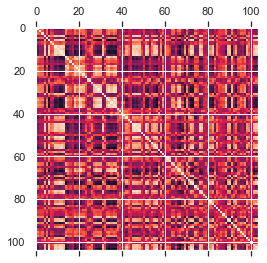

In [10]:
# Vision globale
plt.matshow(df.corr())
plt.show()

En regardant un point de vue global, nous pouvons facilement constater que des "clusters" de corrélation positive et négative semblent se dégager de cette matrice. En nous y intéressant de plus près, nous pouvons constater qu'une partie de ces cluster varie conjointement et nous pouvons supposer que ces variations peuvent dépendre de périodes temporelles tels que les saisons ou les mois encore.

<a id='section2.1.3'></a>
#### *2.1.3. Vision globale*

In [11]:
column_to_analyse = df_all.columns.values

# Enlever le département dans les colones à analyse
# Delete num departement
column_to_analyse = np.delete(column_to_analyse,-3)
# delete month
column_to_analyse = np.delete(column_to_analyse,-1)
# delte year
column_to_sum = np.delete(column_to_analyse,-1)


df_france=df.loc[:,column_to_sum]

df_france["Total Incident"] = df_france[column_to_sum].sum(axis=1)
df_france = df_france.drop(columns=column_to_sum)
df_france.head(5)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_france, ax=ax, ci=int, linewidth=1);

C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Toutefois, la description de ces données est difficile à interpréter. Aussi nous allons nous focaliser sur plusieurs axes clés. Mais avant regardons comment se comportent ces crimes et délits par département.

<a id='section2.2'></a>
### *2.2. Crime et délit par département*
Regardons maintenant la part des crimes et des délits vis-à-vis de leurs zones géographiques. Pour cela, nous allons consolider notre jeu de données avec les informations correspondantes.

In [12]:
column_to_analyse = df_all.columns.values

# Enlever le département dans les colones à analyse
# Delete num departement
column_to_analyse = np.delete(column_to_analyse,-3)
# delete month
column_to_analyse = np.delete(column_to_analyse,-1)

# Validation du typage dans ce df
df_all[column_to_analyse] = df_all[column_to_analyse].astype(int)
df_all.departement = df_all.departement.astype(str)

In [13]:
df_all['total_incidents'] = df_all[column_to_analyse].sum(axis=1)
df_all.head()

libellé index  Règlements de compte entre malfaireurs  \
date                                                    
2020-01-01                                          0   
2019-12-01                                          0   
2019-11-01                                          0   
2019-10-01                                          0   
2019-09-01                                          0   

libellé index  Homicides pour voler et à l'occasion de vols  \
date                                                          
2020-01-01                                                0   
2019-12-01                                                0   
2019-11-01                                                0   
2019-10-01                                                0   
2019-09-01                                                0   

libellé index  Homicides pour d'autres motifs  \
date                                            
2020-01-01                                  0   
2019-12-01                                  0   
2019-11-01                                  1   
2019-10-01                                  0   
2019-09-01                                  1   

libellé index  Tentatives d'homicides pour voler et à l'occasion de vols  \
date                                                                       
2020-01-01                                                     0           
2019-12-01                                                     0           
2019-11-01                                                     0           
2019-10-01                                                     0           
2019-09-01                                                     0           

libellé index  Tentatives homicides pour d'autres motifs  \
date                                                       
2020-01-01                                             0   
2019-12-01                                             2   
2019-11-01                                             0   
2019-10-01                                             0   
2019-09-01                                             0   

libellé index  Coups et blessures volontaires suivis de mort  \
date                                                           
2020-01-01                                                 0   
2019-12-01                                                 0   
2019-11-01                                                 0   
2019-10-01                                                 1   
2019-09-01                                                 0   

libellé index  Autres coups et blessures volontaires criminels ou correctionnels  \
date                                                                               
2020-01-01                                                   134                   
2019-12-01                                                   138                   
2019-11-01                                                   135                   
2019-10-01                                                   155                   
2019-09-01                                                   174                   

libellé index  Prises d'otages à l'occasion de vols  \
date                                                  
2020-01-01                                        0   
2019-12-01                                        0   
2019-11-01                                        0   
2019-10-01                                        0   
2019-09-01                                        0   

libellé index  Prises d'otages dans un autre but  Sequestrations  ...  \
date                                                              ...   
2020-01-01                                     0               1  ...   
2019-12-01                                     0               1  ...   
2019-11-01                                     0               4  ...   
2019-10-01                                     0               2  ...  

Le jeu de donnée est maintenant utilisable. Regardons une description du nombre de crime et délit commis par département.

In [14]:
df_all.groupby('departement').total_incidents.describe().head()

count         mean         std     min     25%     50%     75%  \
departement                                                                   
01           289.0  3965.429066  287.380451  2671.0  3799.0  3991.0  4135.0   
02           289.0  4095.359862  255.695474  3280.0  3968.0  4081.0  4215.0   
03           289.0  3098.955017  151.712933  2730.0  3006.0  3091.0  3170.0   
04           289.0  2640.795848  105.865136  2357.0  2573.0  2635.0  2707.0   
05           289.0  2526.297578   92.396308  2290.0  2457.0  2523.0  2583.0   

                max  
departement          
01           4820.0  
02           6465.0  
03           4177.0  
04           3079.0  
05           2834.0

In [15]:
mean = round((df_all.groupby('departement').total_incidents.mean().values).mean(),2)
print("Moyenne : " + str(mean))
print("Moyenne x 3 : " + str(mean*3))
print("Moyenne / 3 : " + str(mean/3))

Moyenne : 4945.15
Moyenne x 3 : 14835.449999999999
Moyenne / 3 : 1648.3833333333332


Depuis 1996, nous pouvons constater qu'en France par département et par mois, il y a en moyenne 4945 incidents.

Les limites supérieures à notre analyse vont être égales à 3 fois plus et 3 fois moins la valeur moyenne. Elles correspondent ainsi à 14 835 (limite haute) et 1 648 (limite basse) d'incidents.

In [16]:
moyenne = round(df_all.groupby('departement').total_incidents.mean(), 2).values
departement = df_all.groupby('departement').total_incidents.mean().keys()

df_mean_departement = pd.DataFrame({'Moyenne':moyenne})
df_mean_departement = df_mean_departement.set_index(departement)

print("Moyenne d'acte criminel/délit par mois par département")

df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=True)
print(df_mean_departement.head())
df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=False)
print(df_mean_departement.head())

Moyenne d'acte criminel/délit par mois par département
             Moyenne
departement         
975          2018.48
986          2023.73
977          2049.51
48           2182.59
23           2255.70
              Moyenne
departement          
75           24464.89
13           16302.83
59           16211.01
93           13424.40
69           12906.57


In [17]:
print("Departement avec nb incidents supérieur à la limite haute : ")
print(df_mean_departement[df_mean_departement['Moyenne'] > (mean*3)])
print("Departement avec nb incidents inférieur à la limite basse : ")
print(df_mean_departement[df_mean_departement['Moyenne'] < (mean/3)].values)

# Nombre d'incidents total en fm sur l'année 2019
year = df_all.groupby('year').total_incidents.sum()
print("\nNombre d'incidents sur l'année 2019 : " + str(year[2019]))

# Nombre d'incidents total par département sur l'année 2019
year = df_all.groupby(['year','departement']).total_incidents.sum()
year[2019].head()

Departement avec nb incidents supérieur à la limite haute : 
              Moyenne
departement          
75           24464.89
13           16302.83
59           16211.01
Departement avec nb incidents inférieur à la limite basse : 
[]

Nombre d'incidents sur l'année 2019 : 6428563


departement
01    52059
02    50805
03    38668
04    33059
05    30363
Name: total_incidents, dtype: int64

Au vu du nombre d'incidents constaté, nous pouvons supposé que les 3 départements 75, 13 et 59 peuvent être assimilé à des zones plus à risques car avec un nombre d'incidents supérieur à la limite du nombre d'incidents préétabli. Mais pour avoir une vision plus réalisée, regardons le pourcentage d'incident par individu (à savoir par habitant) en fonction des départements.

In [18]:
df_tmp = df_population.merge(year[2019], left_on='Departement', right_on='departement')
df_tmp.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  total_incidents  
0                         0.98            52059  
1                         0.78            50805  
2                         0.49            38668  
3                         0.25            33059  
4                         0.21            30363

In [19]:
df_tmp["% Incident / Personne"] = round(df_tmp["total_incidents"] / df_tmp["Total"] * 100, 2)
df_tmp.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  total_incidents  % Incident / Personne  
0                         0.98            52059                   7.92  
1                         0.78            50805                   9.66  
2                         0.49            38668                  11.67  
3                         0.25            33059                  20.01  
4                         0.21            30363                  21.42

In [20]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=True)
df_tmp.head(10)

Departement      Total  Total Homme  Total Femme  \
35          35  1082073.0     528036.0     554037.0   
67          67  1132607.0     549793.0     582814.0   
57          57  1035866.0     506327.0     529539.0   
62          62  1452778.0     704417.0     748361.0   
29          29   906554.0     440651.0     465903.0   
49          49   815881.0     397709.0     418172.0   
85          85   683187.0     332346.0     350841.0   
56          56   755566.0     365360.0     390206.0   
91          91  1319401.0     645457.0     673944.0   
78          78  1448625.0     702875.0     745750.0   

    % Population Métropolitaine  total_incidents  % Incident / Personne  
35                         1.61            68489                   6.33  
67                         1.69            74779                   6.60  
57                         1.54            68927                   6.65  
62                         2.17            98796                   6.80  
29                         1.35            61770                   6.81  
49                         1.22            56068                   6.87  
85                         1.02            48066                   7.04  
56                         1.13            53620                   7.10  
91                         1.97            95245                   7.22  
78                         2.16           105888                   7.31

In [21]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=False)
df_tmp.head(10)

Departement     Total  Total Homme  Total Femme  \
48          48   76286.0      37808.0      38478.0   
23          23  116270.0      56492.0      59778.0   
90          90  140145.0      69302.0      70843.0   
4           05  141756.0      69231.0      72525.0   
8           09  152398.0      74721.0      77677.0   
14          15  142811.0      69824.0      72987.0   
3           04  165197.0      80612.0      84585.0   
19          2A  162421.0      78523.0      83898.0   
52          52  169250.0      82702.0      86548.0   
46          46  173166.0      83828.0      89338.0   

    % Population Métropolitaine  total_incidents  % Incident / Personne  
48                         0.11            26731                  35.04  
23                         0.17            28380                  24.41  
90                         0.21            30430                  21.71  
4                          0.21            30363                  21.42  
8                          0.23            30924                  20.29  
14                         0.21            28781                  20.15  
3                          0.25            33059                  20.01  
19                         0.24            31262                  19.25  
52                         0.25            32243                  19.05  
46                         0.26            30832                  17.80

En réalisant ces quelques transformations, nous disposons maintenant du taux en pourcentage théorique du nombre d'incidents par personne en fonction des départements. Ce pourcentage permet de visualiser en fonction du nombre de personnes les départements les plus enclins à être source d'incidents. Toutefois, ces chiffres ne prennent pas en compte des cas réalistes où par exemple un individu serait à l'origine de plusieurs incidents.

<a id='section2.3'></a>
### *2.3. Analyse focalisée / Focalisation analysis*
Afin de faciliter l'analyse de ce jeu de donnée, définissons plusieurs pistes d'actes criminels dans notre évaluation. Pour commencer, nous allons étudier les cambriolages, les homicides et les vols.

<a id='section2.3.1'></a>
#### *2.3.1. Cambriolage / Burglary*
Commençons par l'axe cambriolage. Reprenons donc la partie description élémentaire précédemment vue.

In [22]:
# Crimes and mesdemeanours concerning burglary
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
round(df[cambriolage_columns].describe(), 2)

libellé columns  Cambriolages de locaux d'habitations principales  \
count                                                      289.00   
mean                                                     15933.93   
std                                                       2744.01   
min                                                      10865.00   
25%                                                      14048.00   
50%                                                      15617.00   
75%                                                      17193.00   
max                                                      25024.00   

libellé columns  Cambriolages de résidences secondaires  \
count                                            289.00   
mean                                            1666.99   
std                                              439.44   
min                                              953.00   
25%                                             1326.00   
50%                                             1615.00   
75%                                             1939.00   
max                                             4076.00   

libellé columns  Cambriolages de locaux industriels, commerciaux ou financiers  \
count                                                       289.00               
mean                                                       6759.25               
std                                                        1482.47               
min                                                        4406.00               
25%                                                        5545.00               
50%                                                        6356.00               
75%                                                        7715.00               
max                                                       12615.00               

libellé columns  Cambriolages d'autres lieux  
count                                 289.00  
mean                                 6164.39  
std                                  1375.32  
min                                  3982.00  
25%                                  5032.00  
50%                                  5816.00  
75%                                  7301.00  
max                                  9583.00

Pour que cela soit plus représentatif, visualisation le boxplot associé.

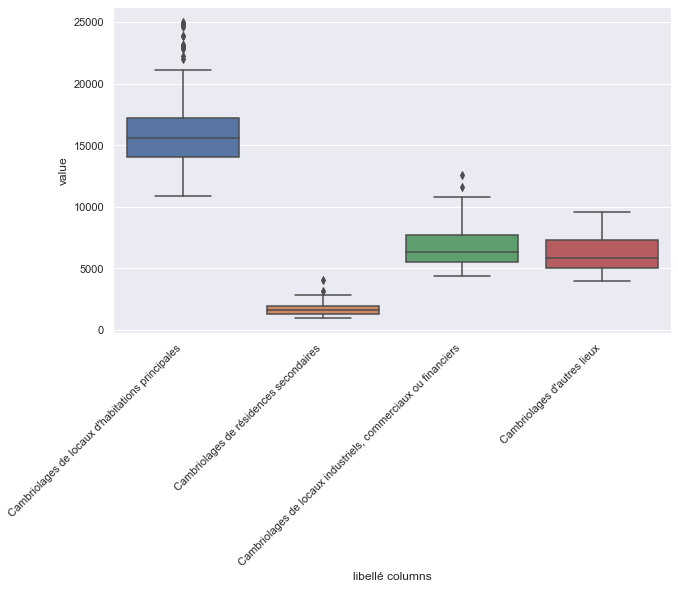

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[cambriolage_columns]))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

Il est clair que les cambriolages des résidences principales occupent la major partie des cambriolages en France.

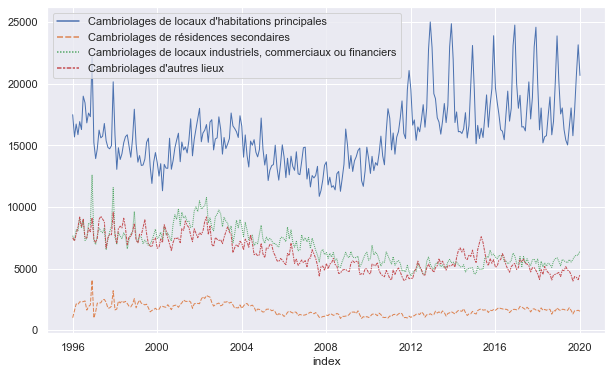

In [24]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc[:,cambriolage_columns], ax=ax, ci=int, linewidth=1);

Une tendance semble émerger depuis 2012 pour les cambriolages d'habitations principales. Aussi réduisons la période à partir de cette année.

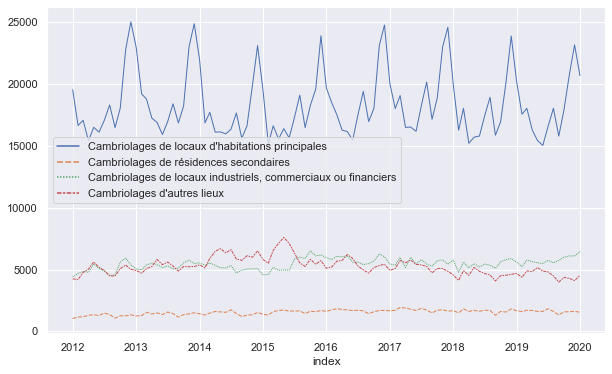

In [25]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc[:'2012-01-01',cambriolage_columns], ax=ax, linewidth=1);

La tendance est bien confirmée. Maintenant, regardons quand le pic de cambriolage des résidences principales se produit. Comparons aussi les cambriolages de l'année 2019 avec la moyenne des cambriolages depuis 1996. Par an, combien avons nous en moyenne de cambriolage ?

libellé columns
Cambriolages de locaux d'habitations principales                 15934.0
Cambriolages de résidences secondaires                            1667.0
Cambriolages de locaux industriels, commerciaux ou financiers     6759.0
Cambriolages d'autres lieux                                       6164.0
dtype: float64


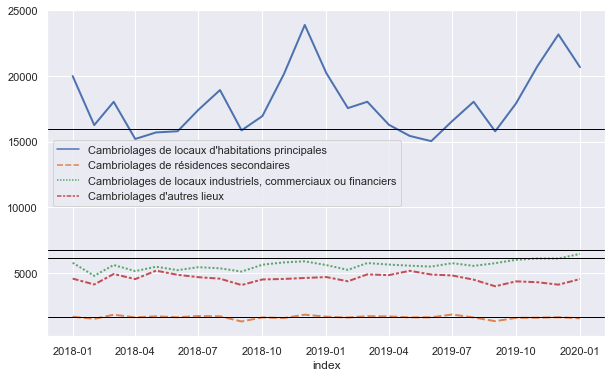

In [26]:
print(round(df[cambriolage_columns].mean(),0))

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2020-01-01':'2018-01-01',cambriolage_columns], ax=ax, linewidth=2)

for mean in df[cambriolage_columns].mean().values:
    ax.axhline(mean, ls='-', color='black', linewidth=1)

Nous pouvons constater que seulement les résidences principales sont concernées par une augmentation du nombre de cambriolages vis-à-vis de leur moyenne depuis 1996. De plus les pics de cambriolages ne concernent visuellement que les habitations principales. Ces pics semblent être focalisé sur les mois de novembre décembre, soit peu de temps avec Noël. Supposons que les autres types de cambriolages soient négligeables, regroupons donc pour continuer notre analyse.

libellé columns  Cambriolages de locaux d'habitations principales  Autre
index                                                                   
2020-01-01                                                  20682  33197
2019-12-01                                                  23170  34991
2019-11-01                                                  20773  32746
2019-10-01                                                  17916  29849
2019-09-01                                                  15789  26832


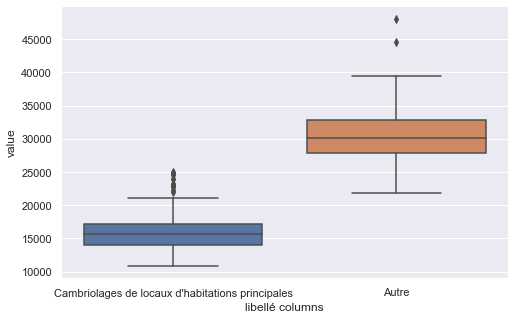

In [27]:
df_cambriolage=df.loc[:,cambriolage_columns]
other_cambriolage_columns = [
    'Cambriolages de résidences secondaires',
    'Cambriolages de locaux industriels, commerciaux ou financiers',
    "Cambriolages d'autres lieux"
]
df_cambriolage["Autre"] = df_cambriolage[cambriolage_columns].sum(axis=1)
df_cambriolage = df_cambriolage.drop(columns=other_cambriolage_columns)
print(df_cambriolage.head(5))

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_cambriolage));

En les regroupant, nous pouvons constater que les cambriolages de lieux n'étant pas des habitations principales représentent une part plus significative du nombre de cambriolages. Intéressons-nous maintenant au graphique temporel associé.

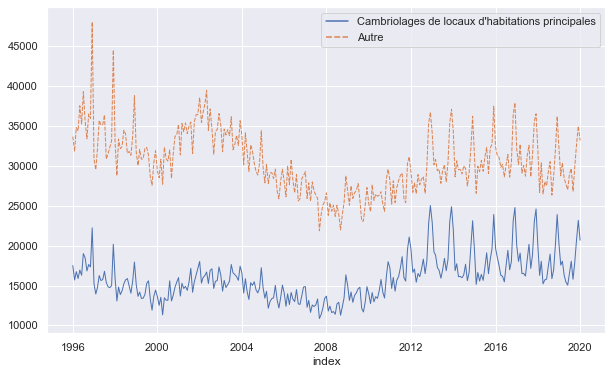

In [28]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_cambriolage, ax=ax, ci=int, linewidth=1);

En les visualisant, nous pouvons constater que la tendance remarquée sur les pics de cambriolages sur les résidences principales est aussi représentée pour les cambriolages d'autres établissements. Nous pouvons en déduire qu'il y a une relation de corrélation entre depuis 2012 entre ces deux variables. Toutefois, il nous est impossible pour l'instant d'en déduire s'il s'agit d'une corrélation hasardeuse ou d'une relation de causalité.

Est-ce que les cambriolages sont représentés dans le département possédant le plus d'incidents ?

Cette question peut être répondue de deux manières. Soit par l'intermédiaire de nombre d'incidents vis-à-vis des départements. Ou alors par le taux d'incident par personne par département. Ces deux approches se valent aussi reprenons les chiffres précédemment calculer.

Pour rappel, le département avec le plus d'incidents est le 75 avec une moyenne de 24 465 incidents par mois. Et le département 48 est celui avec le taux d'incident par personne le plus élevé, à savoir 35.04 % incident par personne.

In [29]:
# Restriction sur le département 75
df_cambriolage_2 = df_all.loc[df_all.departement == '75',cambriolage_columns]
df_cambriolage_2["Autre"] = df_cambriolage_2[cambriolage_columns].sum(axis=1)
df_cambriolage_2 = df_cambriolage_2.drop(columns=other_cambriolage_columns)
df_cambriolage_2.head()

libellé index  Cambriolages de locaux d'habitations principales  Autre
date                                                                  
2020-01-01                                                 1349   1999
2019-12-01                                                 1046   1647
2019-11-01                                                  904   1422
2019-10-01                                                  971   1514
2019-09-01                                                  999   1431

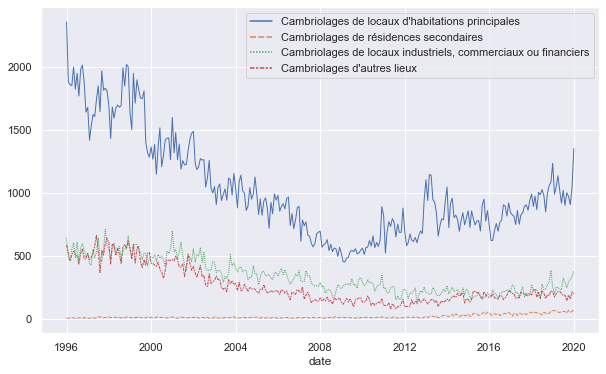

In [30]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '75',cambriolage_columns], ax=ax, ci=int, linewidth=1);

En nous intéressant à ce graphique nous pouvons constater que le nombre de cambriolages dans ce département suit une descendante depuis 1996. Cependant depuis 2009-2010, cette tendance c'est inversé en ayant un pic courant 2013. Focalisons nous maintenant le département avec le taux d'incident le plus élevé.

In [31]:
df_cambriolage_3 = df_all.loc[df_all.departement == '48',cambriolage_columns]
df_cambriolage_3["Autre"] = df_cambriolage_3[cambriolage_columns].sum(axis=1)
df_cambriolage_3 = df_cambriolage_3.drop(columns=other_cambriolage_columns)
df_cambriolage_3.head()

libellé index  Cambriolages de locaux d'habitations principales  Autre
date                                                                  
2020-01-01                                                    4     25
2019-12-01                                                    4      8
2019-11-01                                                    6     18
2019-10-01                                                    8     14
2019-09-01                                                    3     12

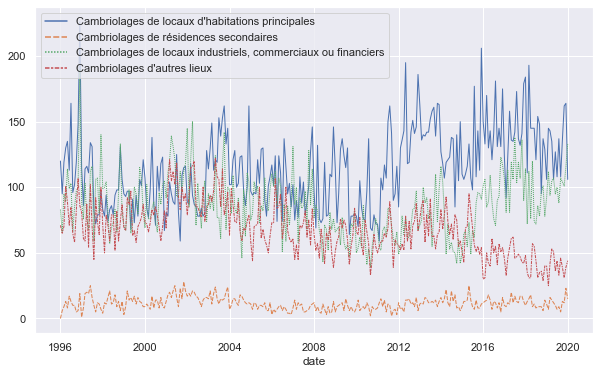

In [32]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '49',cambriolage_columns], ax=ax, ci=int, linewidth=1);

Malgré un taux relativement élevé d'incident par personne, ce département ne possède pas un grand nombre d'observations concernant les cambriolages. Pour des raisons des granularités, il n'est pas intéressant d'étudier par comparaison les départements 48 et 75. Toutefois, regardons la part de cambriolage par personne et par département.

In [33]:
# TO DO :
# def transform_df_mean_departement(columns)

In [34]:
df_cambriolage = df_all.loc[:,cambriolage_columns]
df_cambriolage["Total cambriolage"] = df_cambriolage.loc[:,cambriolage_columns].sum(axis=1)
df_cambriolage["departement"] = df_all.loc[:,'departement']
df_cambriolage["year"] = df_all.loc[:,'year']

# df_cambriolage.head()

mean_cambriolage = round(df_cambriolage.groupby('departement')["Total cambriolage"].mean(), 2).values

df_cambriolage_mean_departement = pd.DataFrame({'Moyenne':mean_cambriolage})
df_cambriolage_mean_departement = df_cambriolage_mean_departement.set_index(departement)

print("Nombre de cambriolage moyen par département par mois : " + str())

df_cambriolage_mean_departement = df_cambriolage_mean_departement.sort_values(by='Moyenne', ascending=True)
print(df_cambriolage_mean_departement.head())
df_cambriolage_mean_departement = df_cambriolage_mean_departement.sort_values(by='Moyenne', ascending=False)
print(df_cambriolage_mean_departement.head())

Nombre de cambriolage moyen par département par mois : 
             Moyenne
departement         
975             0.20
986             1.91
977             2.06
48             17.09
15             27.67
             Moyenne
departement         
75           1640.01
13           1476.70
59           1385.20
69           1256.16
06            899.25


In [35]:
df_cambriolage_year = df_cambriolage.groupby(['year','departement'])["Total cambriolage"].sum()
df_cambriolage_personne = df_population.merge(df_cambriolage_year[2019], left_on='Departement', right_on='departement')
df_cambriolage_personne["% Cambriolage / Personne"] = round(df_cambriolage_personne["Total cambriolage"] / df_cambriolage_personne["Total"] * 100, 2)
df_cambriolage_personne.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
0                         0.98               4420                      0.67  
1                         0.78               3228                      0.61  
2                         0.49               1669                      0.50  
3                         0.25                886                      0.54  
4                         0.21                434                      0.31

In [36]:
df_cambriolage_personne = df_cambriolage_personne.sort_values(by='% Cambriolage / Personne', ascending=True)
print("Les plus faibles taux de % de cambriolage / personne")
df_cambriolage_personne.head()

Les plus faibles taux de % de cambriolage / personne


Departement     Total  Total Homme  Total Femme  \
20          2B  182258.0      88411.0      93847.0   
48          48   76286.0      37808.0      38478.0   
50          50  490669.0     239023.0     251646.0   
19          2A  162421.0      78523.0      83898.0   
53          53  305365.0     150300.0     155065.0   

    % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
20                         0.27                260                      0.14  
48                         0.11                183                      0.24  
50                         0.73               1164                      0.24  
19                         0.24                390                      0.24  
53                         0.46                863                      0.28

In [37]:
df_cambriolage_personne = df_cambriolage_personne.sort_values(by='% Cambriolage / Personne', ascending=False)
print("Les plus forts taux de % de cambriolage / personne")
df_cambriolage_personne.head()

Les plus forts taux de % de cambriolage / personne


Departement      Total  Total Homme  Total Femme  \
69          69  1876051.0     901603.0     974448.0   
12          13  2034469.0     972786.0    1061683.0   
75          75  2148271.0    1008617.0    1139654.0   
44          44  1437137.0     697201.0     739936.0   
33          33  1633440.0     785304.0     848136.0   

    % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
69                         2.80              17662                      0.94  
12                         3.03              17727                      0.87  
75                         3.20              18326                      0.85  
44                         2.14              11297                      0.79  
33                         2.44              12909                      0.79

In [38]:
print("Moyenne d'acte criminel/délit par mois par département")

Moyenne d'acte criminel/délit par mois par département


Pour résumer l'analyse des cambriolages en France :
- Les cambriolages touchent par mois entre 0,15% et 1% de la population française (dépendant de la région)
- Entre 1996 et 2008, le nombre de cambriolages en France suivait une tendance de diminution,
- Depuis 2008, la tendance est repartie à la hausse,
- Depuis 2012, les cambriolages manifestent des pics périodiques à l'approche de la période de Noël (hivernale).
- Le département le plus touché par les cambriolages est le 69, et le moins touché est le 2B


<a id='section2.3.2'></a>
#### *2.3.2. Homicides / murders*

Continuons avec l'axe homicide.

libellé columns  Homicides pour voler et à l'occasion de vols  \
count                                                  289.00   
mean                                                     3.70   
std                                                      3.01   
min                                                      0.00   
25%                                                      2.00   
50%                                                      3.00   
75%                                                      5.00   
max                                                     16.00   

libellé columns  Homicides pour d'autres motifs  \
count                                    289.00   
mean                                      57.39   
std                                       15.80   
min                                       29.00   
25%                                       47.00   
50%                                       55.00   
75%                                       65.00   
max                                      170.00   

libellé columns  Tentatives d'homicides pour voler et à l'occasion de vols  \
count                                                       289.00           
mean                                                          7.00           
std                                                           4.34           
min                                                           0.00           
25%                                                           4.00           
50%                                                           6.00           
75%                                                           9.00           
max                                                          26.00           

libellé columns  Tentatives homicides pour d'autres motifs  \
count                                               289.00   
mean                                                109.19   
std                                                  43.76   
min                                                  50.00   
25%                                                  82.00   
50%                                                  93.00   
75%                                                 123.00   
max                                                 250.00   

libellé columns  Homicides commis contre enfants de moins de 15 ans  
count                                                       289.00   
mean                                                          5.67   
std                                                           3.14   
min                                                           0.00   
25%                                                           3.00   
50%                                                           5.00   
75%                                                           7.00   
max                                                          20.00

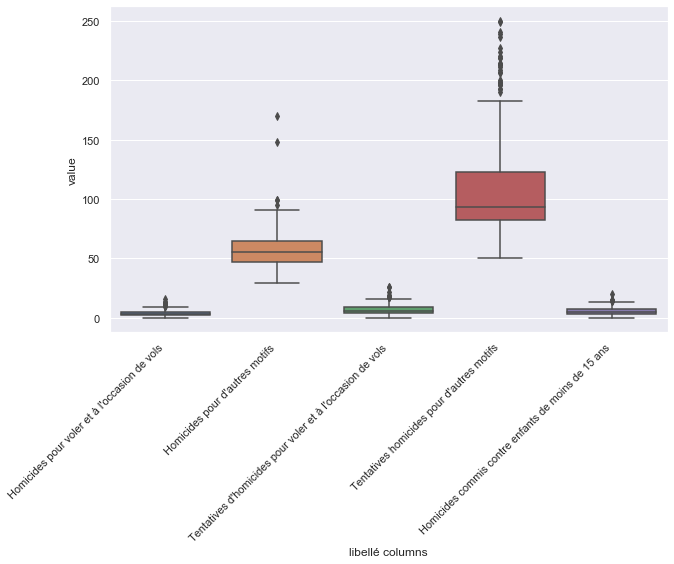

In [39]:
# Crimes and mesdemeanours concerning murders
homicides_columns = df.filter(regex=(".*[Hh]omicide?s.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[homicides_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

round(df[homicides_columns].describe(), 2)

Cet axe regroupe deux aspects. D'un côté les homicides et de l'autre les tentatives d'homicide. On remarque que l'immense majorité de ces cas représente des homicides et tentatives d'homicide pour des raisons autres que "pour voler", "à l'occasion de vols" ou "contre des enfants de moins de 15 ans".

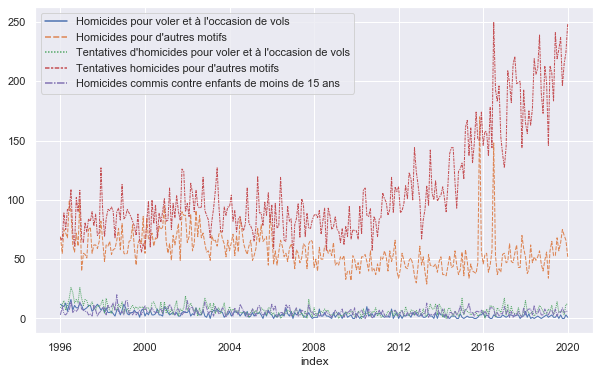

In [40]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[homicides_columns], ax=ax, ci=int, linewidth=1);

Cette visualisation est difficile à interpréter, pour plus de simplicité nous allons décomposer en homicide et tentative d'homicides. Cependant, nous pouvons constater une tendance émergente pour les tentatives d'homicide "d'autres motifs" depuis 2010. De plus, deux pics d'homicides sont représentés autour de l'année 2016.

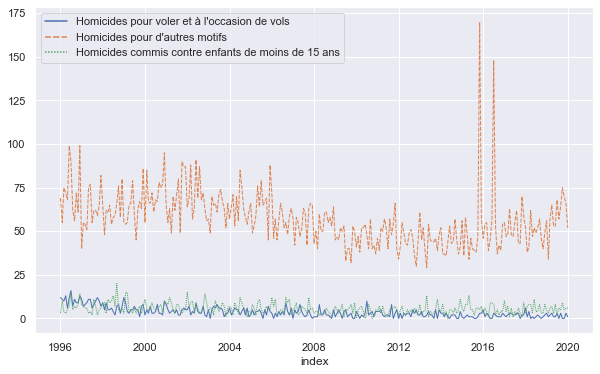

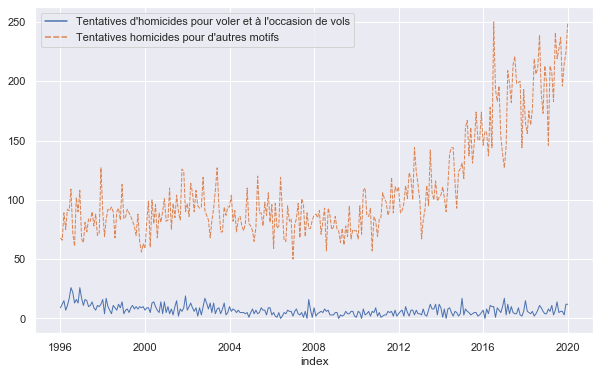

In [41]:
# Homicides
only_homicides_columns = df.filter(regex=(".*Homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_homicides_columns], ax=ax, ci=int, linewidth=1)

# Tentatives
only_tentative_homicides_columns = df.filter(regex=(".*homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_tentative_homicides_columns], ax=ax, ci=int, linewidth=1)

# Zoom
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2016':'2014',homicides_columns], ax=ax, linewidth=1);

La tendance et ces pics sont plus clairs maintenant. En affichant la vue entre l'année 2014 et 2016, nous pouvons observer les deux pics d'homicides précédemment évoquées en fin d'année 2015 et en été 2016. Ces pics correspondent aux deux périodes d'attaques terroristes en France. La première à Paris sur plusieurs sites (dont le bataclan) et la seconde à Nice sur la promenade des Anglais. Ce deuxième justifie aussi le pic de tentatives d'homicide dû au grand nombre de blessés par cette seconde attaque.

Le '75' est le département  avec le plus haut taux de cambriolage. Quand est-il des homicides ?

libellé index  All Homicide  All Tenta Homicide
date                                           
2020-01-01                4                  16
2019-12-01                4                  15
2019-11-01                3                   9
2019-10-01                9                  16
2019-09-01                2                  13

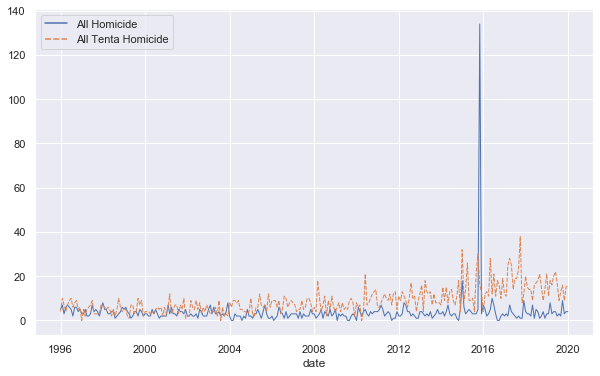

In [42]:
# Restriction sur le département 75
df_homicide = df_all.loc[df_all.departement == '75',homicides_columns]
df_homicide["All Homicide"] = df_homicide[only_homicides_columns].sum(axis=1)
df_homicide["All Tenta Homicide"] = df_homicide[only_tentative_homicides_columns].sum(axis=1)

df_homicide = df_homicide.drop(columns=homicides_columns)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '75',homicides_columns], ax=ax, ci=int, linewidth=1)


fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_homicide, ax=ax, ci=int, linewidth=1)

df_homicide.head()

Le département 75 a fait partie zones d'attaque terroriste, d'où la présence du pic fin 2015. En comparaison de la France, ce département est l'une des principales zones où l'on peut constater des homicides et tentatives d'homicide. De plus, ce département présente une hausse du nombre de tentatives d'homicide.

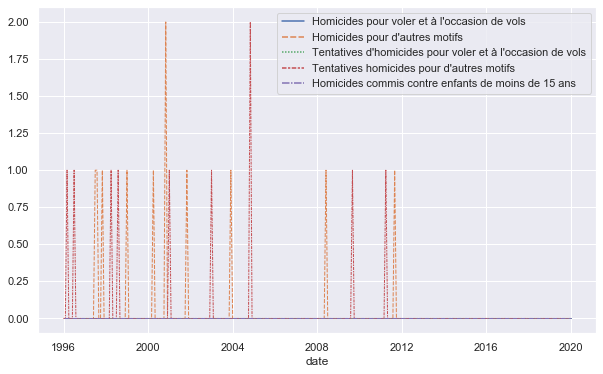

In [43]:
# Restriction sur le département 48
df_homicide = df_all.loc[df_all.departement == '48',homicides_columns]
df_homicide["Autre"] = df_homicide[homicides_columns].sum(axis=1)
df_homicide = df_homicide.drop(columns=homicides_columns)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '48',homicides_columns], ax=ax, ci=int, linewidth=1);

Dans le département 48, nous constatons une absence totale d'homicide et un très faible taux du nombre de tentatives d'homicide. Pourraient être intéressants de regarder les zones les plus soumis aux homicides et tentatives d'homicide. <br>

Pour résumer l'axe homicide :
- La France a vu son taux d'homicide diminuer de manière globale. Cependant certains évènements (attaques terroristes) ont causé une augmentation du nombre d'homicide et de tentatives d'homicide.
- Depuis 2010, la France connait une tendance progressive du nombre de tentatives d'homicide qui a pratiquement triplé.

<a id='section2.3.3'></a>
#### *2.3.3. Vols*
Passons maintenant à l'axe vols.

In [44]:
# Crimes and mesdemeanours concerning thief
voles_columns = df.filter(regex=(".*[Vv]ol?[es].*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[voles_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

L'analyse de l'axe vols est complexe. Pour permettre de la rendre plus pertinente, nous allons la décomposer en sous-axes.

La grande quantité d'information rend difficile l'exploitation simple de ce dernier axe. Aussi nous allons le subdivisé en fonction de critère pour avoir 5 sous catégories :
- vols à main
- vols spécifiques
- vols violents
- vols 'simple'
- vols véhicule

##### *2.3.3.1. Vols à main*

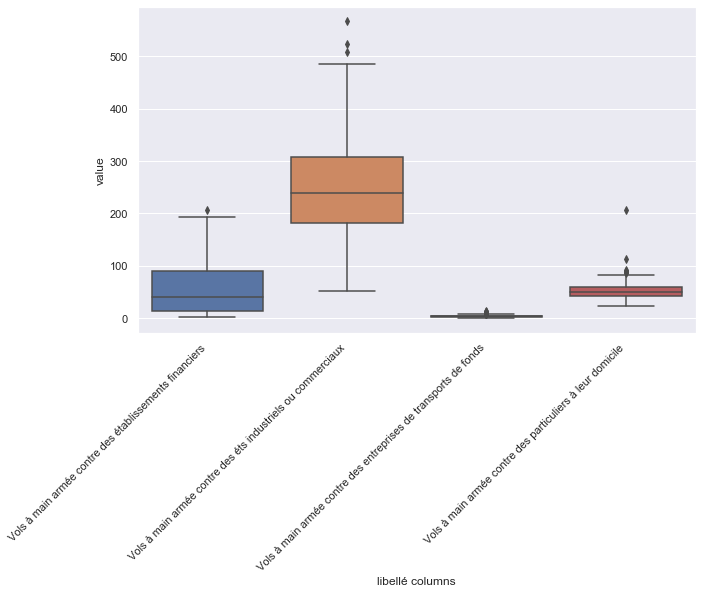

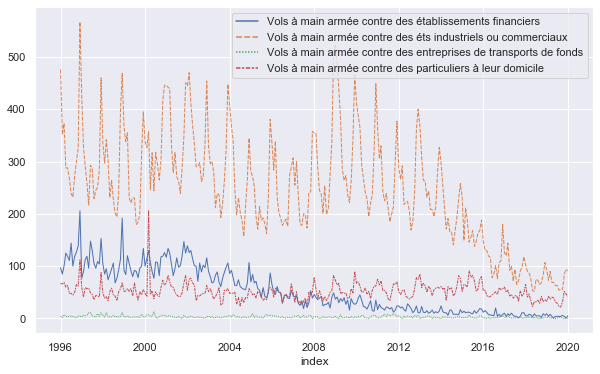

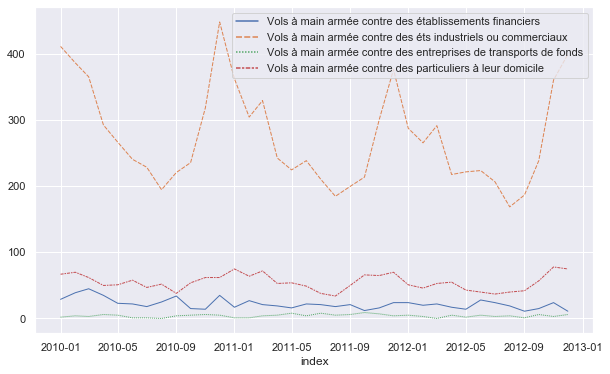

In [45]:
vols_with_hands_column = df.filter(regex=(".*Vols à main.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_with_hands_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_with_hands_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2012':'2010',vols_with_hands_column], ax=ax, ci=int, linewidth=1);

Il apparait très clairement une tendance périodique sur les vols à main armée contre des établissements industriels ou commerciaux. Celle-ci semble correspondre à l'arrivée de la période de Noël. Les vols à main armée contre des établissements industriels ou commerciaux suivent aussi une tendance qui tend à diminuer depuis 2010. Sur cet axe, les vols à main armée contre des établissements industriels ou commerciaux sont les plus importants, les autres étaient moins importants, aussi nous allons les regrouper.

libellé columns  Vols à main armée contre des éts industriels ou commerciaux  \
index                                                                          
2020-01-01                                                      91             
2019-12-01                                                      94             
2019-11-01                                                      85             
2019-10-01                                                      55             
2019-09-01                                                      56             

libellé columns  Autre  
index                   
2020-01-01          48  
2019-12-01          48  
2019-11-01          56  
2019-10-01          39  
2019-09-01          28

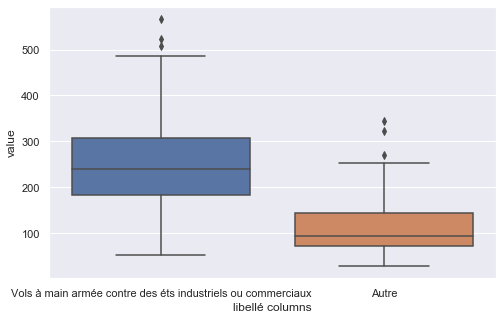

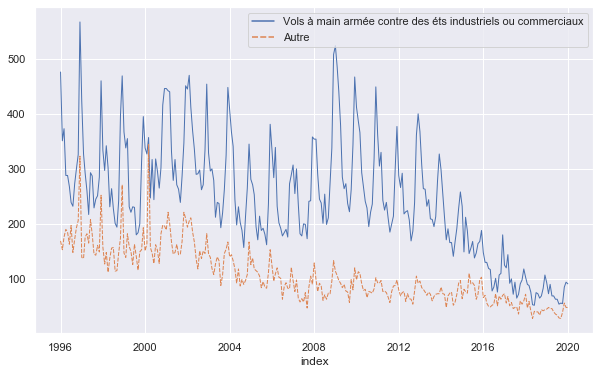

In [46]:
df_vols_with_hands = df.loc[:,vols_with_hands_column]
other_cambriolage_columns = [
    'Vols à main armée contre des établissements financiers',
    'Vols à main armée contre des entreprises de transports de fonds',
    'Vols à main armée contre des particuliers à leur domicile'
]

df_vols_with_hands["Autre"] = df_vols_with_hands[other_cambriolage_columns].sum(axis=1)
df_vols_with_hands = df_vols_with_hands.drop(columns=other_cambriolage_columns)

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_vols_with_hands));

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_vols_with_hands, ax=ax, ci=int, linewidth=1);

df_vols_with_hands.head()

Cette représentation plus simple nous confirme qu'il apparait ici très clairement qu'en France les vols à main armée tendent à diminuer.

##### *2.3.3.2. Vols spécifiques*

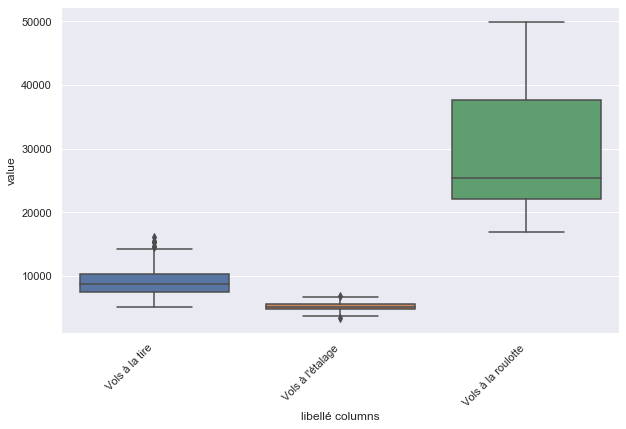

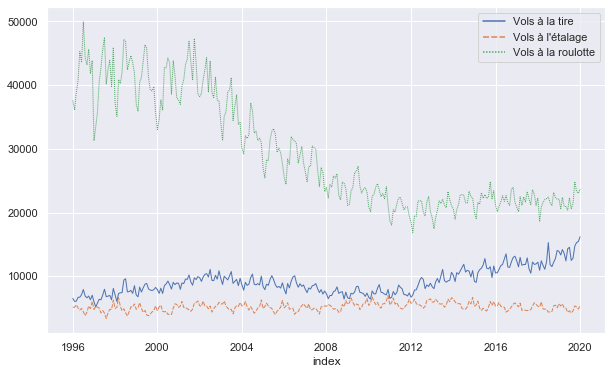

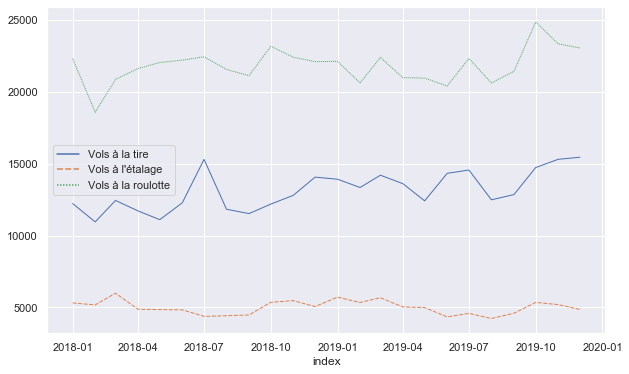

In [47]:
vols_specific_column = ['Vols à la tire', "Vols à l'étalage", 'Vols à la roulotte']

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_specific_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_specific_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_specific_column], ax=ax, ci=int, linewidth=1);

Les vols dits spécifiques représentent la plus grande quantité de cas enregistrés en France. Ici nous allons rester assez simpliste. Il existe une tendance décroissante du nombre de vols à la roulotte, à l'inverse les vols à la tire tendent à augmenter depuis 2012.

##### *2.3.3.3. Vols violents*

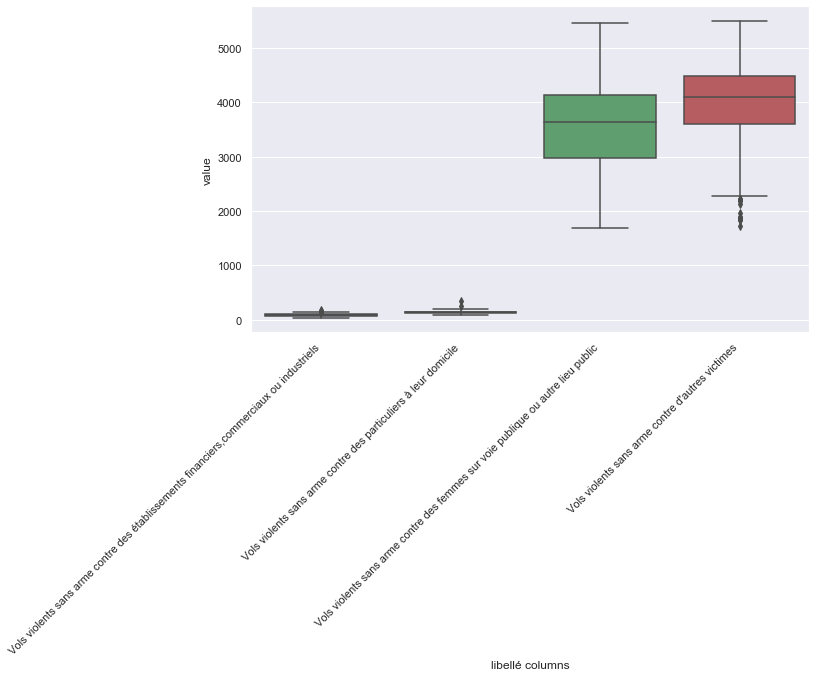

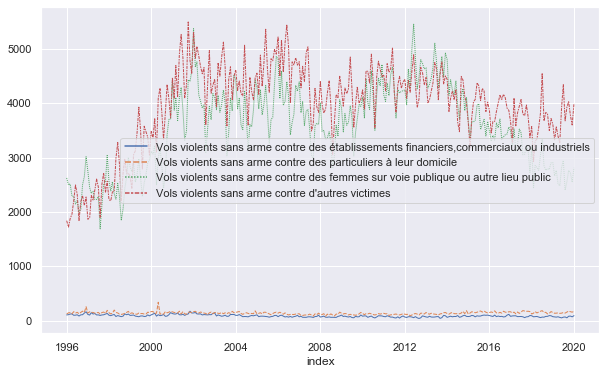

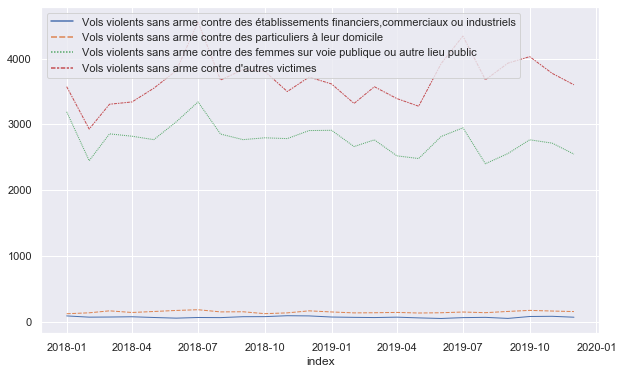

In [48]:
vols_violents_column = df.filter(regex=(".*Vols violents.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_violents_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_violents_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_violents_column], ax=ax, ci=int, linewidth=1);

In [49]:
vols_violents_column

array(['Vols violents sans arme contre des établissements financiers,commerciaux ou industriels',
       'Vols violents sans arme contre des particuliers à leur domicile',
       'Vols violents sans arme contre des femmes sur voie publique ou autre lieu public',
       "Vols violents sans arme contre d'autres victimes"], dtype=object)

Ce sous-axe peut être séparé en deux ensembles. D'un côté les "Vols violents sans arme contre des femmes sur voie publique ou autre lieu public" avec les "Vols violents sans arme contre d'autres victimes" qui représenter la majorité des données de cette analyse et de l'autre les "Vols violents sans arme contre des établissements financiers, commerciaux ou industriels" avec les "Vols violents sans arme contre des particuliers à leur domicile" qui sont pratiquement inexistant en comparaison.

##### *2.3.3.4. Vols simple*

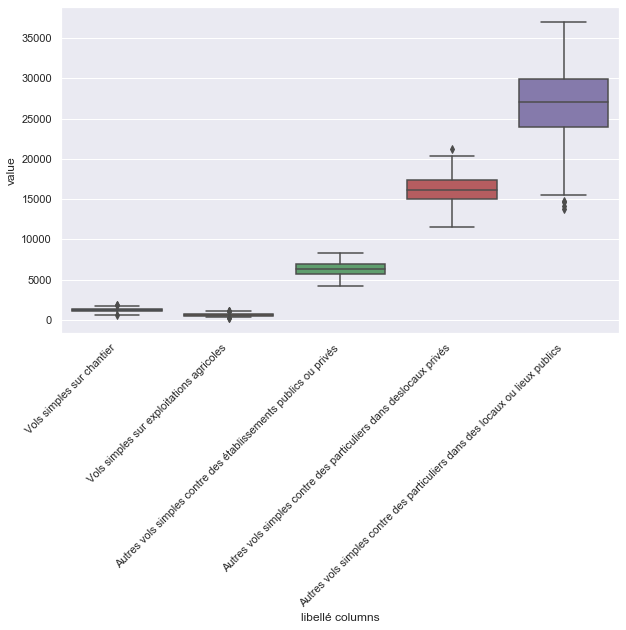

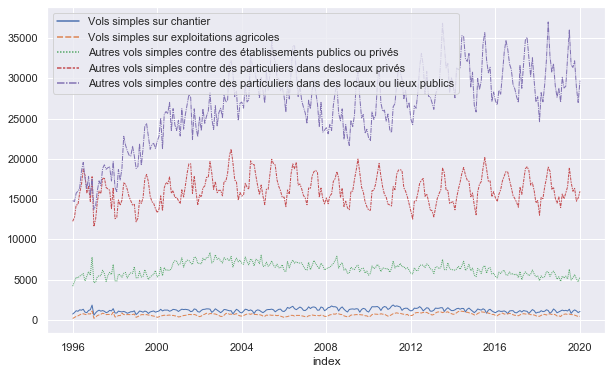

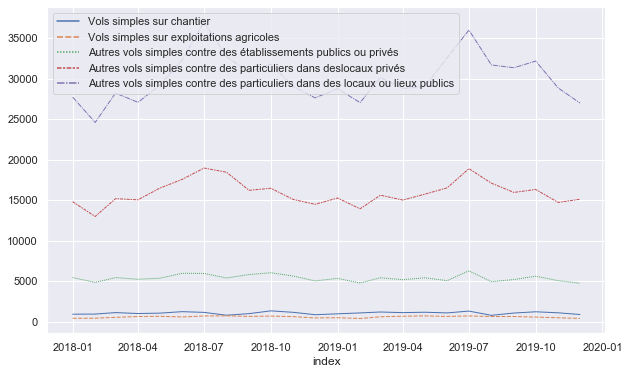

In [50]:
vols_simple_column = df.filter(regex=(".*simple.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_simple_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_simple_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_simple_column], ax=ax, ci=int, linewidth=1);

Nous pouvons remarquer que la quantité de données liées aux activités 'Vols simples sur chantier', 'Vols simples sur exploitations agricoles' et 'Autres vols simples contre des établissements publics ou privés' sont assez restreintes en comparaison des 'Autres vols simples contre des particuliers dans deslocaux privés' et des 'Autres vols simples contre des particuliers dans des locaux ou lieux publics'. Aussi nous allons les regrouper pour plus de simpliciter.

In [51]:
vols_simple_column

array(['Vols simples sur chantier',
       'Vols simples sur exploitations agricoles',
       'Autres vols simples contre des établissements publics ou privés',
       'Autres vols simples contre des particuliers dans deslocaux privés',
       'Autres vols simples contre des particuliers dans des locaux ou lieux publics'],
      dtype=object)

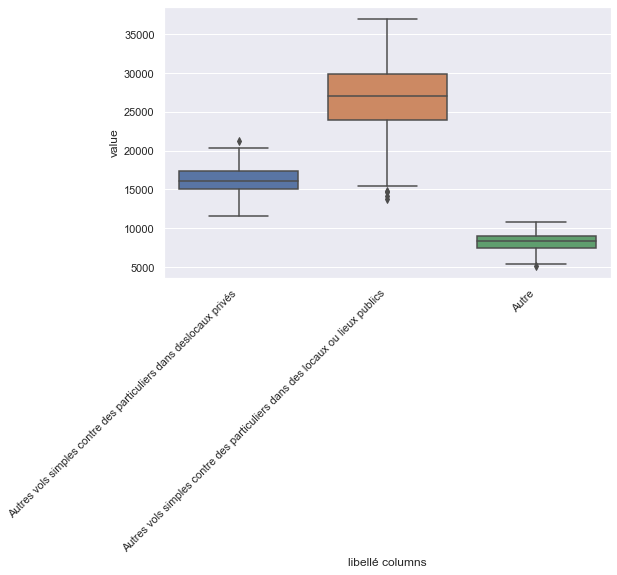

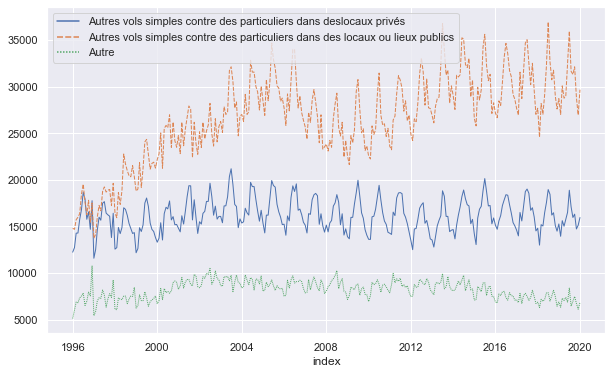

In [52]:
df_vols_simple_column = df.loc[:,vols_simple_column]
        
other_vols_columns = [
    'Vols simples sur chantier',
    'Vols simples sur exploitations agricoles',
    'Autres vols simples contre des établissements publics ou privés'
]

df_vols_simple_column["Autre"] = df_vols_simple_column[other_vols_columns].sum(axis=1)
df_vols_simple_column = df_vols_simple_column.drop(columns=other_vols_columns)

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_vols_simple_column));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_vols_simple_column, ax=ax, ci=int, linewidth=1);

Ce regroupement nous permet de visualiser des périodicités sur l'ensemble des actes de ce sous-axe.

##### *2.3.3.5. Vols véhicule*

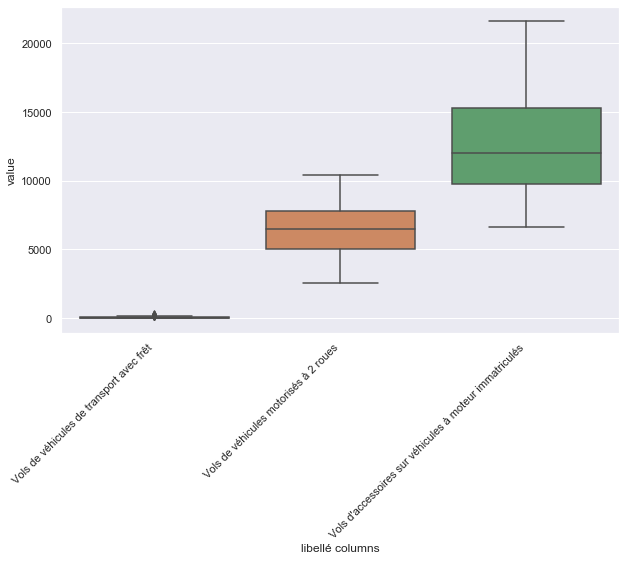

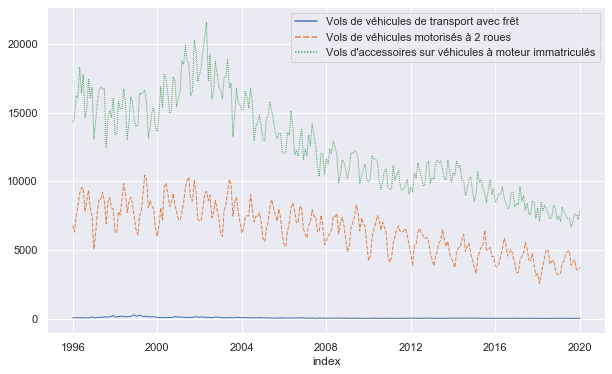

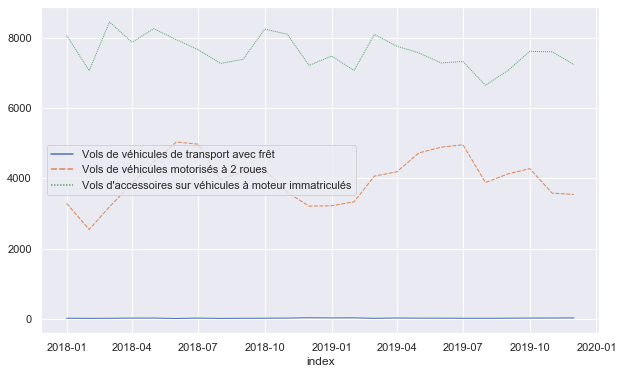

In [53]:
vols_vehicules_column = df.filter(regex=("Vols.*véhicule.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_vehicules_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_vehicules_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_vehicules_column], ax=ax, ci=int, linewidth=1);

Ce dernier sous axe montre que le nombre de vols de véhicule motorisés à 2 roues et de transport avec frêt tend à diminuer.